In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')  # 更改绘图风格 R语言绘图库的风格
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']= False

In [2]:
train = pd.read_csv('C:/TEMP/Excel/bike/train.csv')

In [3]:
train.shape

(10886, 12)

In [4]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
#数据无缺失
#字段说明：
#datetime=时间，season=季节（春夏秋冬），holiday=是否是假期，workingday=是否是工作日，weather=天气(晴、阴、小雨小雪、恶劣天气)
#temp=温度，atemp=体感温度,humidity=湿度，windspeed=风速，causal=未注册用户租借数量，registered=注册用户租借数量，count=总租借数量

In [6]:
#datetime增加年月日时的列，方便后续分析
train['year']=pd.to_datetime(train['datetime']).dt.year
train['month']=pd.to_datetime(train['datetime']).dt.month
train['day']=pd.to_datetime(train['datetime']).dt.day
train['hour']=pd.to_datetime(train['datetime']).dt.hour
train['weekday']=pd.to_datetime(train['datetime']).dt.weekday

In [7]:
train.shape

(10886, 17)

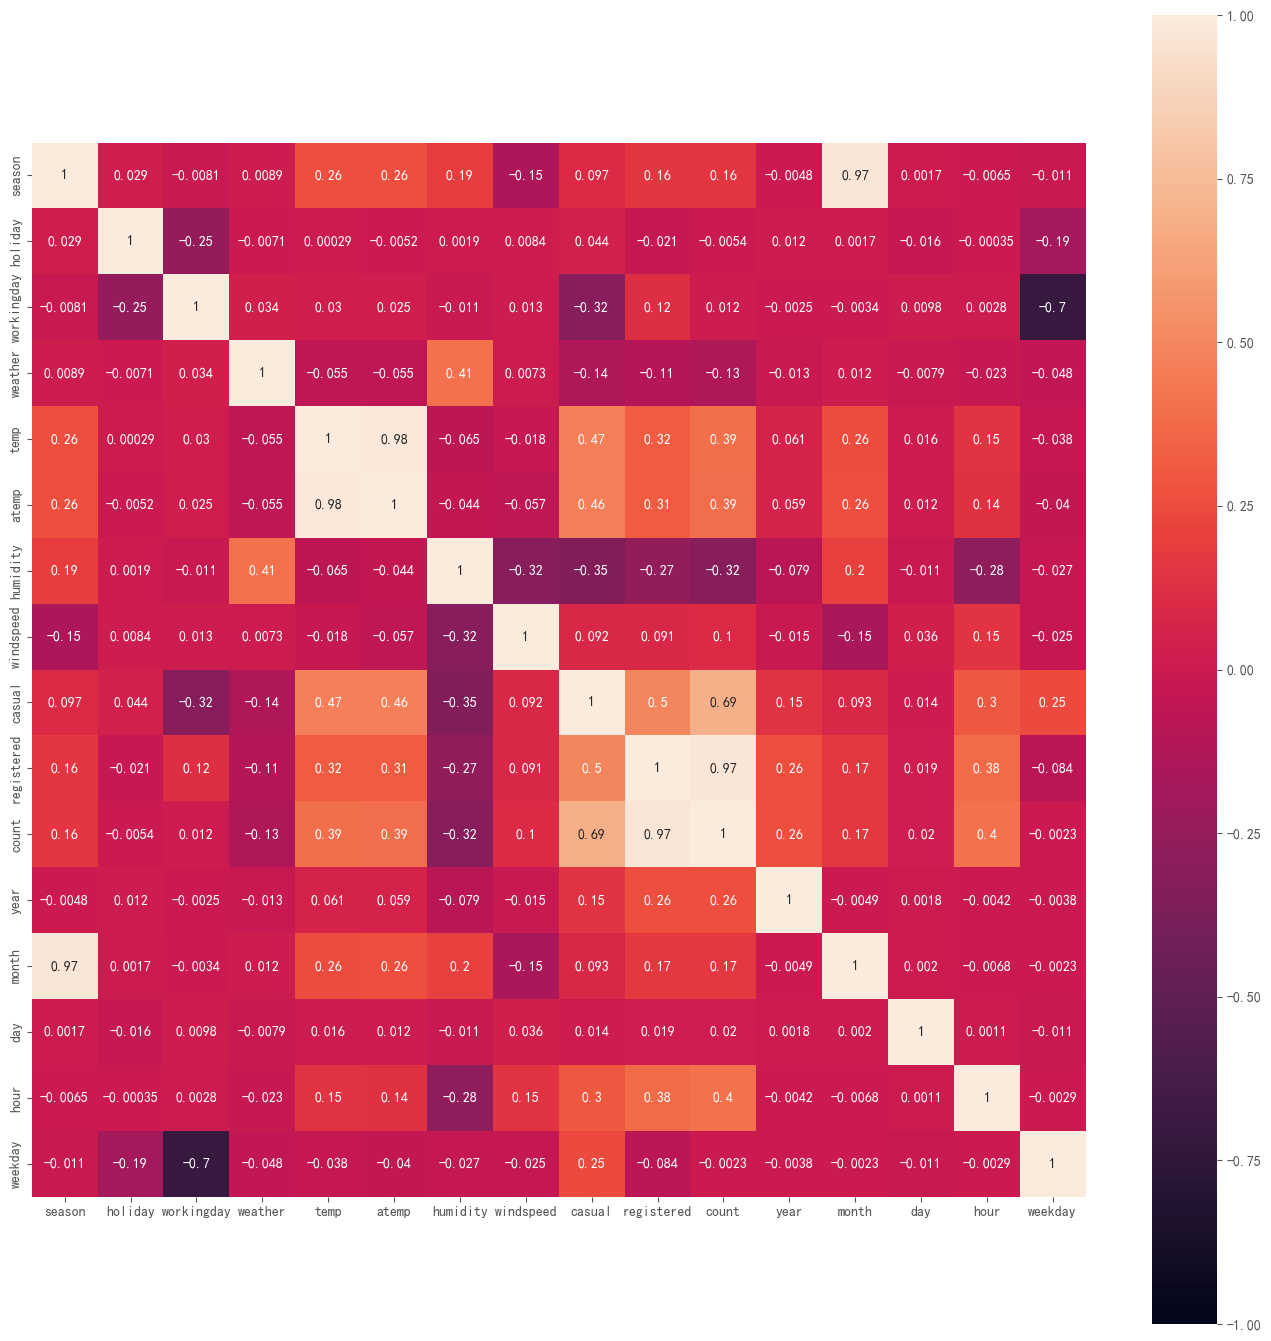

In [8]:
#相关性
corrDf=train.corr()
fig,ax= plt.subplots()
fig.set_size_inches(17, 17)
sn.heatmap(corrDf,vmin=-1,vmax = 1,square = True,annot=True)
plt.show()

In [9]:
#图中可看到租借量的相关性热图
#再补充一个各特征与租借量相关性的排列 
#ascending=False为降序
corrDf['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
weekday      -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

In [10]:
#初步结论，抛开是否是注册用户这个性质后，与时间段、温度、湿度的相关性更大

(1.0, 12.0)

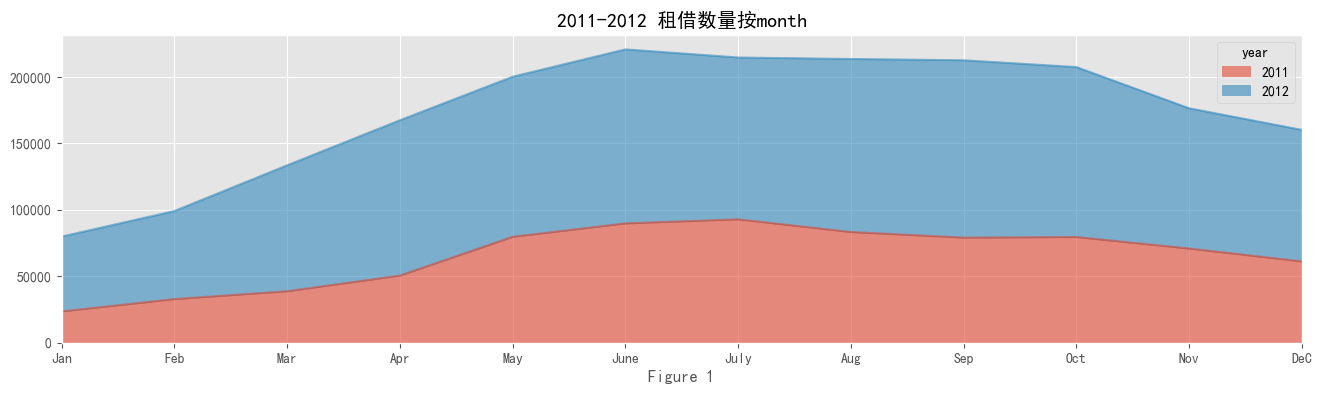

In [11]:
#按照年份月份
fig1=plt.figure(figsize=(16,4))
ax1=plt.subplot(111)
df1=train.groupby(['month','year']).sum().unstack()['count']
df1.plot(kind='area',ax=ax1,alpha=0.6)
ax1.set_title('2011-2012 租借数量按month')
ax1.set_xlabel('Figure 1')
ax1.set_xticks(list(range(13)))
ax1.set_xticklabels(['','Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','DeC'])
ax1.set_xlim(1,12)

In [12]:
#简评：2012年较2011年相比，显著提升，且六到十月为租借高峰期

(0.0, 800.0)

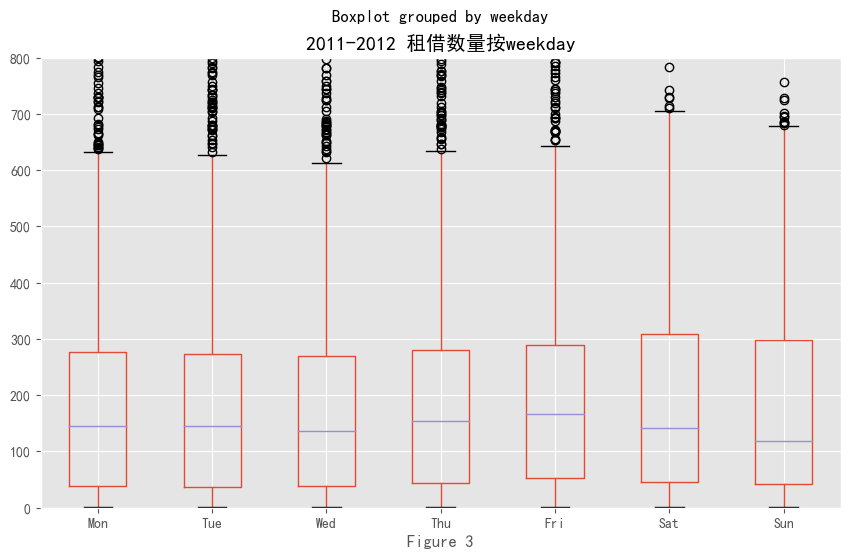

In [13]:
#按照是周几
fig2=plt.figure(figsize=(10,6))
ax2=plt.subplot(111)
df2=train[['count','weekday']]
df2.boxplot(by='weekday',ax=ax2)
ax2.set_title('2011-2012 租借数量按weekday')
ax2.set_xlabel('Figure 3')
ax2.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation='horizontal')
ax2.set_ylim(0,800)

In [14]:
#简评：跟周几也没有太大差别，基本持平

(0.0, 800.0)

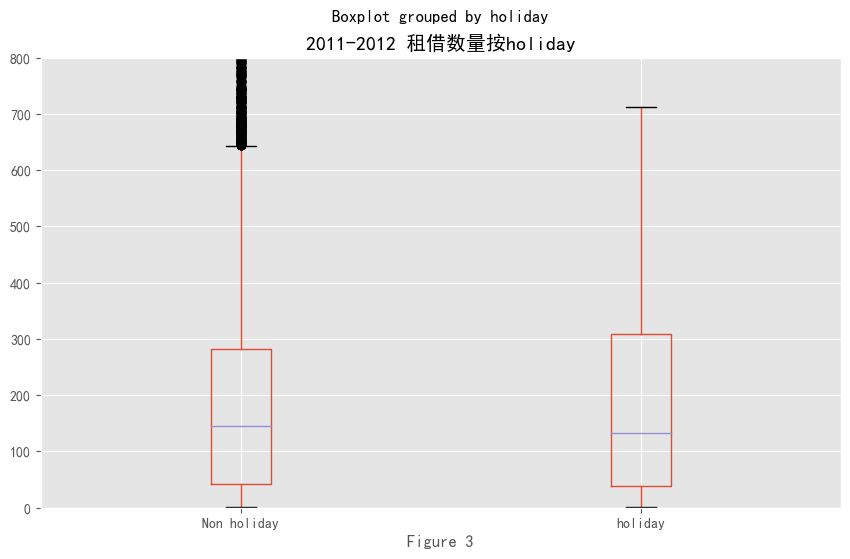

In [15]:
#按照是否是假期
fig3=plt.figure(figsize=(10,6))
ax3=plt.subplot(111)
df3=train[['count','holiday']]
df3.boxplot(by='holiday',ax=ax3)
ax3.set_title('2011-2012 租借数量按holiday')
ax3.set_xlabel('Figure 3')
ax3.set_xticklabels(['Non holiday','holiday'],rotation='horizontal')
ax3.set_ylim(0,800)

In [16]:
#简评：是否是节假日影响不大

(0.0, 23.0)

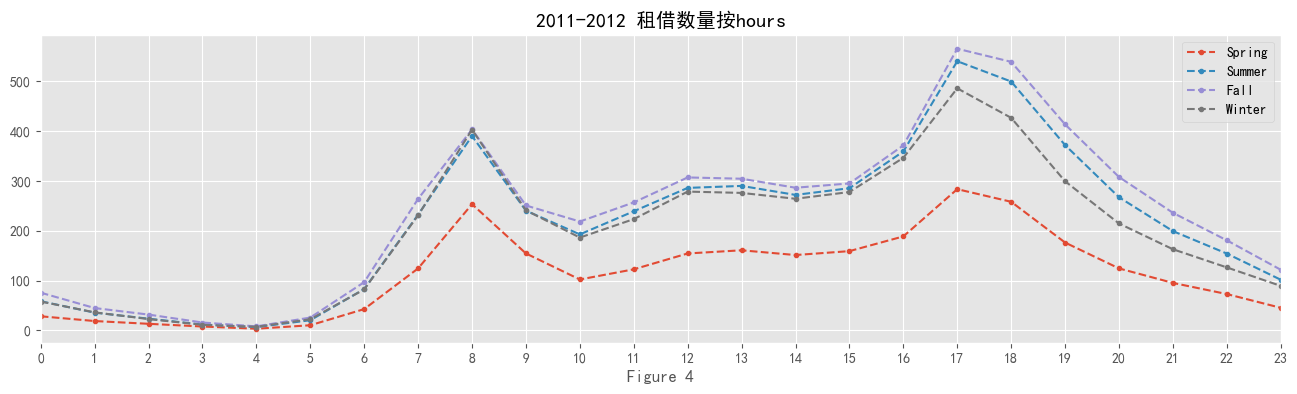

In [17]:
#按照四季的各个时间段
fig4=plt.figure(figsize=(16,4))
ax4=plt.subplot(111)
df4=train.groupby(['hour', 'season']).mean().unstack()['count']
df4.columns=['Spring','Summer','Fall','Winter']
df4.plot(ax=ax4, style='--.')
ax4.set_title('2011-2012 租借数量按hours')
ax4.set_xlabel('Figure 4')
ax4.set_xticks(list(range(24)))
ax4.set_xticklabels(list(range(24)))
ax4.set_xlim(0,23)

In [18]:
#简评：每个季节趋势基本一致，四季对比是冬天最多春天最少；时间段的话主要是在上下班高峰期

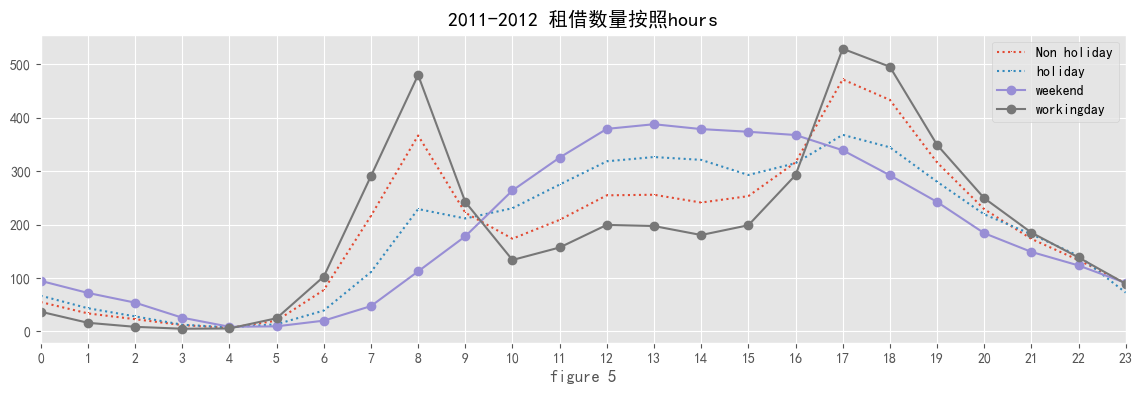

In [19]:
#按是否是假期，是否是工作日
fig5=plt.figure(figsize=(14,4))
ax5=plt.subplot(111)
df51=train.groupby(['hour','holiday']).mean().unstack()['count'].rename(columns={0:'Non holiday',1:'holiday'})
df52=train.groupby(['hour','workingday']).mean().unstack()['count'].rename(columns={0:'weekend',1:'workingday'})
df51.plot(ax=ax5,style=':,')
df52.plot(ax=ax5,style='-o')
ax5.set_title('2011-2012 租借数量按照hours')
ax5.set_xlabel('figure 5')
ax5.set_xticks(list(range(24)))
ax5.set_xticklabels(list(range(24)))
ax5.set_xlim(0,23)
ax5.legend()
plt.show()

In [20]:
#简评：节假日对于时间段的影响不大；工作日早晚高峰期数量多，周末的时候中午时间数量多

In [21]:
#环境因素